In [9]:
import tensorflow as tf 
from tensorflow import keras
import os 
import numpy as np 
import matplotlib.pyplot as plt
import segmentation_models as sm
from glob import glob
import cv2


In [3]:
base_path = 'D:/Dropbox/2. WORK/SNUH/Atopy Segmentation'
path_8 = os.path.join(base_path, 'Intersect_0.8')

In [4]:
x_train = glob(os.path.join(path_8, 'Atopy_Segment_Train', '*/*.jpg'))
y_train = glob(os.path.join(path_8, 'Atopy_Segment_Train', '*/*.png'))

x_test = glob(os.path.join(path_8, 'Atopy_Segment_Test', '*/*.jpg'))
y_test = glob(os.path.join(path_8, 'Atopy_Segment_Test', '*/*.png'))

x_val = glob(os.path.join(path_8, 'Atopy_Segment_Extra', '*/*.jpg'))
y_val = glob(os.path.join(path_8, 'Atopy_Segment_Extra', '*/*.png'))

In [31]:
N_RES = 256 
train_images = [] 
train_labels = [] 

for x in x_train:
    img = cv2.imread(x, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (N_RES, N_RES))
    # img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    img = np.float64(img)
    
    lbl = cv2.imread(x, cv2.COLOR_BGR2GRAY)
    lbl = cv2.resize(lbl, (N_RES, N_RES))
    # lbl = cv2.normalize(lbl, None, 0, 255, cv2.NORM_MINMAX)
    lbl = np.float64(lbl)
    
    train_images.append(img) 
    train_labels.append(lbl) 
    # 
train_images = np.reshape(train_images, [-1, N_RES, N_RES, 3])
train_labels = np.reshape(train_labels, [-1, N_RES, N_RES, 1])
    

In [13]:
test_images = [] 
test_labels = [] 

for x in x_train:
    img = cv2.imread(x, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (N_RES, N_RES))
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    img = np.float32(img)
    
    lbl = cv2.imread(x, cv2.COLOR_BGR2GRAY)
    lbl = cv2.resize(lbl, (N_RES, N_RES))
    lbl = cv2.normalize(lbl, None, 0, 255, cv2.NORM_MINMAX)
    lbl = np.float32(lbl)
    
    test_images.append(img) 
    test_labels.append(lbl) 
    
test_images = np.reshape(test_images, [-1, N_RES, N_RES, 3])
test_labels = np.reshape(test_labels, [-1, N_RES, N_RES, 1])

In [32]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [33]:
# preprocess input
train_images = preprocess_input(train_images)
# x_val = preprocess_input(x_val)


In [34]:
train_images.shape, train_labels.shape

((1412, 256, 256, 3), (4236, 256, 256, 1))

In [35]:
model = sm.Unet('resnet34', input_shape=(N_RES, N_RES, 3), encoder_weights=None)

In [37]:
# define model
# model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score,
            #  'accuracy',
            #  'val_accuracy'
             ],
)

# fit model
# if you use data generator use model.fit_generator(...) instead of model.fit(...)
# more about `fit_generator` here: https://keras.io/models/sequential/#fit_generator
hist = model.fit(x=train_images,
                 y=train_labels,
                 batch_size=16,
                 epochs=100,
                 validation_split=0.3,
                #    validation_data=(x_val, y_val),   
                )

Epoch 1/100
62/62 [==============================] - 21s 251ms/step - loss: -334.5827 - iou_score: 14.6777 - val_loss: -55173672.0000 - val_iou_score: 153.9676
Epoch 2/100
62/62 [==============================] - 14s 224ms/step - loss: -1352.6802 - iou_score: 126.9186 - val_loss: -68054.2266 - val_iou_score: 151.7126
Epoch 3/100
62/62 [==============================] - 14s 219ms/step - loss: -2590.1997 - iou_score: 143.8783 - val_loss: -9116.3389 - val_iou_score: 153.9645
Epoch 4/100
62/62 [==============================] - 13s 217ms/step - loss: -4151.8589 - iou_score: 143.9279 - val_loss: -31626.4980 - val_iou_score: 153.9676
Epoch 5/100
62/62 [==============================] - 14s 230ms/step - loss: -6255.9009 - iou_score: 143.6610 - val_loss: -194784880.0000 - val_iou_score: 153.9676
Epoch 6/100
62/62 [==============================] - 14s 230ms/step - loss: -8814.3105 - iou_score: 143.8838 - val_loss: -103415.5625 - val_iou_score: 153.9557
Epoch 7/100
62/62 [======================

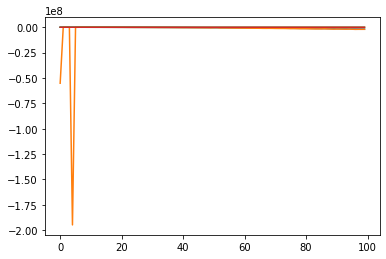

In [39]:
# plt.plot(hist.history['accuracy'], label = "accuracy")
plt.plot(hist.history['loss'], label = "loss")
plt.plot(hist.history['val_loss'], label = "val_loss")
plt.plot(hist.history['iou_score'], label = "iou_score")
plt.plot(hist.history['val_iou_score'], label = "val_iou_score")
# plt.legend(loc = "uppder left")
plt.show()